In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.express as px
import squarify
import plotly.graph_objects as go

# Load datasets

In [3]:
consequence= pd.read_csv('../db_tables/consequence.tsv', sep='\t')
mutations = pd.read_csv('../db_tables/mutation.tsv', sep='\t').merge(consequence)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Traer los nombres de las prote
proteins = pd.read_csv('../db_tables/protein.tsv', sep='\t', usecols=['id_protein', 'uniprot_acc', 'uniprot_name'])
prot_mutation = mutations.merge(proteins)[
    ['id_mutation',	'snp_id', 'start_aa', 'end_aa',	'consequence', 'uniprot_acc', 'uniprot_name']
]
prot_mutation.uniprot_name = prot_mutation.uniprot_name.str.split("_").str[0] # delete "_HUMAN"
# Group
prot = prot_mutation.groupby('uniprot_name')['id_mutation'].count().sort_values(ascending= False)

In [5]:
prot_others = pd.Series({'others': prot[10:].sum()})
prot_topten = prot
# prot_topten = prot[:1000]
prot_topten_others= pd.concat([prot_others, prot_topten])

In [6]:
prot_topten

uniprot_name
TITIN    20552
BRCA2    12063
APC       9237
BRCA1     9177
ATM       8472
         ...  
ELYS         1
TPTE         1
CT451        1
HAUS7        1
NCOA4        1
Name: id_mutation, Length: 5402, dtype: int64

# Mutations plots

## Mutations donnut

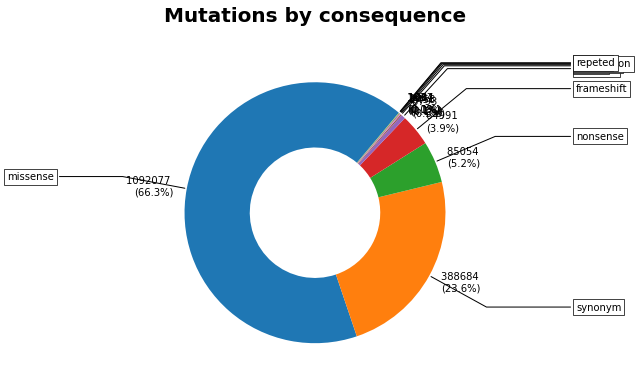

In [7]:
# %% Mutations by consequence Donut
#plt.style.use('seaborn-pastel')
cq = mutations.consequence.value_counts()
labels = cq.index
sizes = cq
pcts = [f'{s} \n({s*100/sum(sizes):.1f}%)' for s in sizes]
#width = 0.35

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle= 50, labels= pcts) #, rotatelabels=True

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(cq.index[i], xy=(x, y), xytext=(2*np.sign(x), 1.5*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Mutations by consequence\n", fontsize=20, weight= 'bold')

plt.show()

## Mutations Treemap

In [8]:
labels

Index(['missense', 'synonym', 'nonsense', 'frameshift', 'deletion', 'delins',
       'insertion', 'duplication', 'nostop', 'repeted'],
      dtype='object')

In [9]:
fig = px.treemap(
    names = ["Eve","Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents = ["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve"]
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [10]:
fig = px.treemap(
    data_frame = consequence,
    #names = consequence.consequence.tolist(),
    path= ['consequence'],
    values= sizes.tolist(),
    #parents = consequence.consequence.tolist()
    title= "Mutations by consequence in DisPhaseDB",
    #texttemplate = "%{path}: %{values:$,s} <br>(%{percent})",
   # textposition = "inside"
   width=1500, #px
   height= 1000 #px
)
fig.update_traces(root_color="lightgrey")
#fig.add_trace(go.treemap(textinfo = 'percent entry')) # no va

fig.show()

In [11]:
percents = (
    (sizes/sum(sizes))*100
).tolist()
percents

[66.30575483657877,
 23.599055756050884,
 5.164076957824742,
 3.9459464054128883,
 0.5338694087303707,
 0.14923814473549998,
 0.12391987526654007,
 0.10710174422840602,
 0.06114028142744039,
 0.009896589744461552]

In [12]:
# fig.data[0].customdata = np.column_stack([sizes, percents])
fig.data[0].customdata = [x[1] for x in np.column_stack([sizes, percents])]
fig.data[0].values = [x[0] for x in np.column_stack([sizes, percents])]


In [36]:
fig.data[0].labels = consequence.consequence.tolist()

In [33]:
fig.data[0].customdata

(66.30575483657877,
 23.599055756050884,
 5.164076957824742,
 3.9459464054128883,
 0.5338694087303707,
 0.14923814473549998,
 0.12391987526654007,
 0.10710174422840602,
 0.06114028142744039,
 0.009896589744461552)

In [34]:
fig.data[0].values

(1092077.0,
 388684.0,
 85054.0,
 64991.0,
 8793.0,
 2458.0,
 2041.0,
 1764.0,
 1007.0,
 163.0)

In [37]:
fig.data

(Treemap({
     'branchvalues': 'total',
     'customdata': [66.30575483657877, 23.599055756050884, 5.164076957824742,
                    3.9459464054128883, 0.5338694087303707, 0.14923814473549998,
                    0.12391987526654007, 0.10710174422840602, 0.06114028142744039,
                    0.009896589744461552],
     'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
     'hovertemplate': 'labels=%{label}<br>value=%{value}<br>parent=%{parent}<br>id=%{id}<extra></extra>',
     'ids': array(['deletion', 'delins', 'duplication', 'frameshift', 'insertion',
                   'missense', 'nonsense', 'nostop', 'repeted', 'synonym'], dtype=object),
     'labels': [missense, synonym, nonsense, frameshift, deletion, delins,
                insertion, duplication, nostop, repeted],
     'name': '',
     'parents': array(['', '', '', '', '', '', '', '', '', ''], dtype=object),
     'root': {'color': 'lightgrey'},
     'texttemplate': '%{label}<br>%{value}: %{customdata:.1f}%<br>',
     'va

In [39]:

# fig.data[0].texttemplate = "%{label}<br>%{value}<br>Count:%{customdata[0]}<br>Percent of total:%{customdata[1]:.2f}%"
fig.data[0].texttemplate = "%{label}<br>%{value} (%{customdata:.1f}%)<br>"
fig.show()

In [14]:
#fig.data[0].customdata = list(range(10))

In [170]:
# import kaleido
# import plotly.graph_objects as go

In [40]:
fig.write_image("mutations_consequence.png")

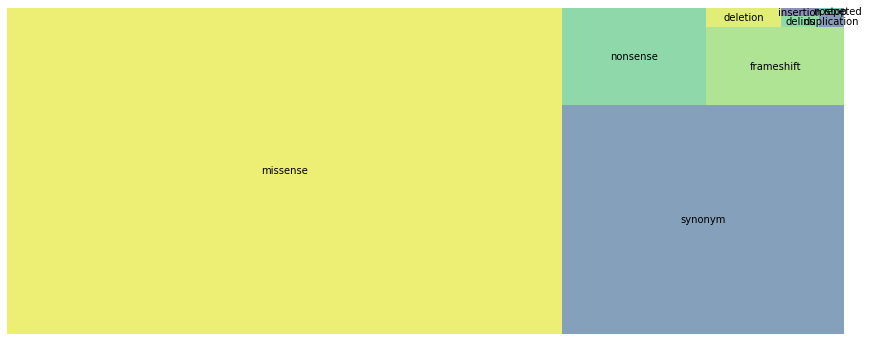

In [38]:
plt.subplots(figsize= (15,6))
squarify.plot(sizes, label= consequence.consequence.tolist(), alpha=0.6 )
plt.axis('off')
plt.show()

# Mutations and Proteins

In [20]:
len(prot_topten)

5402

In [161]:
np.linspace(1, 1000, 6, dtype=int)

array([   1,  200,  400,  600,  800, 1000])

In [174]:
np.arange(0, 1001, 200, dtype=int)

array([   0,  200,  400,  600,  800, 1000])

## Distribution by protein

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



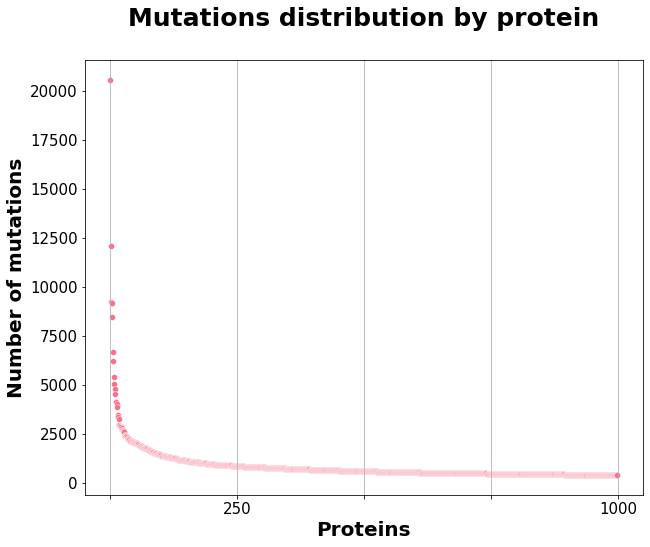

<Figure size 432x288 with 0 Axes>

In [193]:
# PLOT top ten mutations in LLPS proteins
from matplotlib.ticker import MaxNLocator
#sns.set_style("whitegrid")
sns.set_palette("husl", 10)

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(x= prot_topten.index[:1000], y= prot_topten[:1000])#.set(xticklabels=[])

#ax.locator_params(axis="x", nbins=10)
#ax.set(xticklabels=np.linspace(1, 1000, 6, dtype=int))
ax.set(xticklabels=['',  '',250, '', '', 1000])
#ax.tick_params(bottom=False)
ax.tick_params(labelsize=15)
#ax.set_xticklabels(np.linspace(1, 1000, 7, dtype=int))
ax.xaxis.set_major_locator(MaxNLocator(5))

ax.grid(axis="x")
ax.set_title("Mutations distribution by protein\n", fontsize=25, weight='bold')
ax.set_ylabel ("Number of mutations", fontsize=20, weight='bold')
ax.set_xlabel ("Proteins", fontsize=20, weight='bold')
plt.show()

## As histogram

In [41]:
prot_topten

uniprot_name
TITIN    20552
BRCA2    12063
APC       9237
BRCA1     9177
ATM       8472
         ...  
ELYS         1
TPTE         1
CT451        1
HAUS7        1
NCOA4        1
Name: id_mutation, Length: 5402, dtype: int64

In [45]:
np.log(prot_topten)

uniprot_name
TITIN    9.930714
BRCA2    9.397898
APC      9.130972
BRCA1    9.124456
ATM      9.044522
           ...   
ELYS     0.000000
TPTE     0.000000
CT451    0.000000
HAUS7    0.000000
NCOA4    0.000000
Name: id_mutation, Length: 5402, dtype: float64

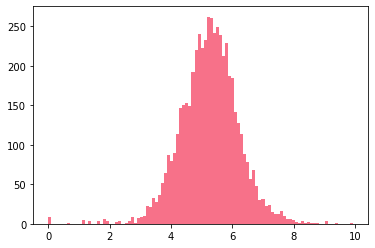

In [89]:
#from math import log10
fig, ax = plt.subplots()
plt.hist(np.log(prot_topten), bins= 100)
#plt.xticks(prot_topten)
#plt.locator_params(axis='x', nbins=20)
#plt.xticks(np.arange(min(prot_topten), max(prot_topten)+1, 500))
plt.show()

In [105]:
np.linspace(min(prot_topten), max(prot_topten), 10, dtype=int)

array([    1,  2284,  4567,  6851,  9134, 11418, 13701, 15985, 18268,
       20552])

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



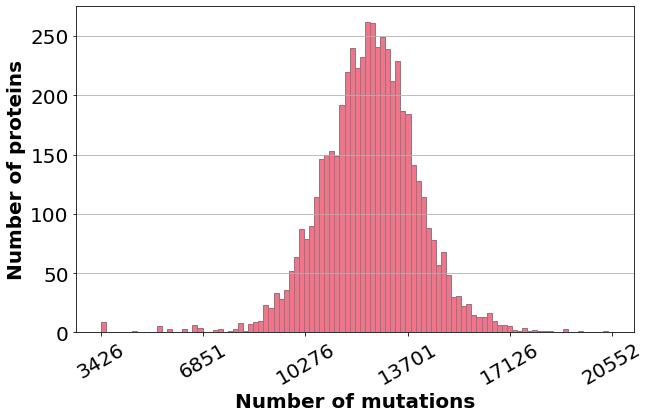

In [141]:
# Este es el que vaaaaaaaaa
fig, ax = plt.subplots(figsize=(10,6))
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
plt.hist(np.log(prot_topten), bins= 100, edgecolor='gray')
# plt.show()

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Testing'

ax.set_xticklabels(np.linspace(min(prot_topten), max(prot_topten), 7, dtype=int))
plt.xticks(rotation=30)
ax.tick_params(labelsize=20)
ax.grid(axis='y')
plt.xlabel("Number of mutations", fontsize=20, weight='bold')
plt.ylabel("Number of proteins", fontsize=20, weight='bold')


plt.show()

(0.0, 1.0)

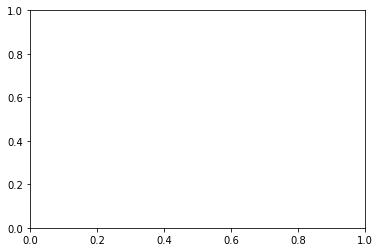

In [123]:
plt.xlim()

304.89300259163275 534.0770314124368


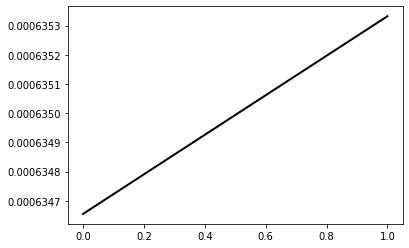

In [120]:

from scipy.stats import norm
  
# Generate some data for this 
# demonstration.
data = np.random.normal(170, 10, 250)
  
# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(prot_topten)
print(mu, std)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)

<AxesSubplot:xlabel='id_mutation', ylabel='Count'>

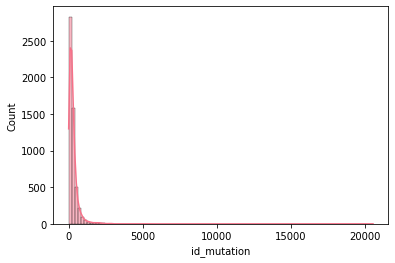

In [43]:
sns.histplot(data= prot_topten, bins=100, kde= True)

In [82]:
prot_mutation

,id_mutation,snp_id,start_aa,end_aa,consequence,uniprot_acc,uniprot_name
0,1,rs184639841,442,442,synonym,Q9ULP9,TBC24
1,2,rs12373107,480,480,synonym,Q9ULP9,TBC24
2,3,rs201059992,500,500,synonym,Q9ULP9,TBC24
3,4,rs189089167,503,503,synonym,Q9ULP9,TBC24
4,5,rs13339237,69,69,synonym,Q9ULP9,TBC24
...,...,...,...,...,...,...,...
1647027,1549229,NaN,3,3,missense,Q9NPJ4,PNRC2
1647028,1549230,NaN,44,44,missense,Q9NPJ4,PNRC2
1647029,1549231,NaN,93,93,missense,Q9NPJ4,PNRC2
1647030,1549232,NaN,37,37,missense,Q9NPJ4,PNRC2


# Mutations by domains

## Pfam data

In [86]:
mutation_pfam = pd.read_csv('../db_tables/mutation_has_pfam_domain.tsv', sep='\t')
pfam_domain = pd.read_csv('../db_tables/pfam_domain.tsv', sep='\t')
mutation_pfam = mutation_pfam.merge(pfam_domain)

In [87]:
# groupby the column to group on "name". Then, ["id_mutation"] to specify the col to perform the actual aggregation.
pfam = mutation_pfam.groupby('pfam_domain')['id_mutation'].count().sort_values(ascending= False)

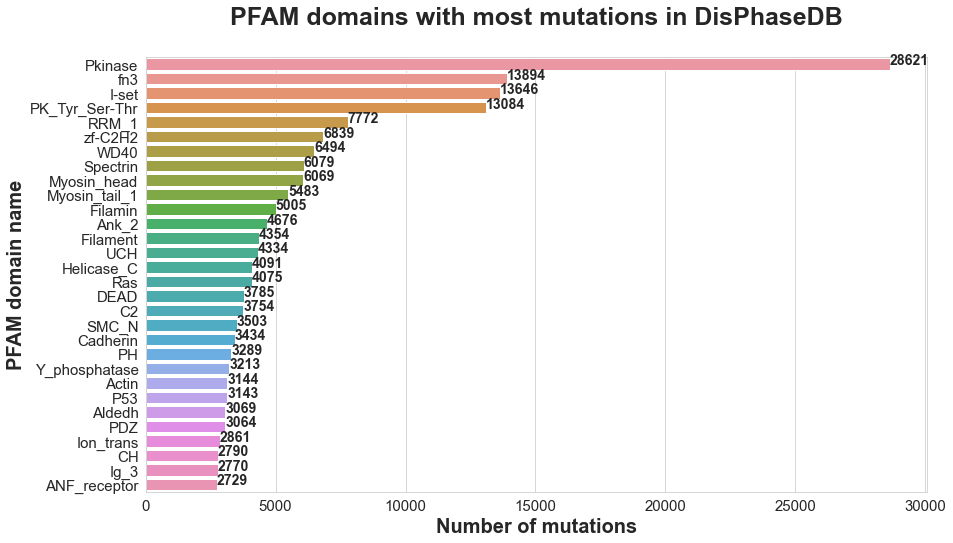

In [90]:
pfam_others = pd.Series({'others': pfam[10:].sum()})
pfam_topten = pfam[:30]
pfam_topten_others= pd.concat([pfam_others, pfam_topten])
# PLOT Top Ten mutations in PFAM domains
# Horizontal barplot
sns.set_style("whitegrid")
sns.set_palette("husl", 1)

bar,ax = plt.subplots(figsize=(14,8))
ax = sns.barplot(x= pfam_topten, y= pfam_topten.index, orient='h')
ax.set_title("PFAM domains with most mutations in DisPhaseDB\n", fontsize=25, weight='bold')
ax.set_xlabel ("Number of mutations", fontsize=20, weight='bold')
ax.set_ylabel ("PFAM domain name", fontsize=20, weight='bold')
ax.tick_params(labelsize=15)
for i, v in enumerate(pfam_topten):
    ax.text(v, i, str(v), weight='bold', fontsize=14)

plt.show()

# Others

## PFam formated

In [91]:
rol = pd.read_csv('../db_tables/rol.tsv', sep='\t')
mlo = pd.read_csv('../db_tables/mlo.tsv', sep='\t')
protein_has_mlo = pd.read_csv('../db_tables/protein_has_mlo.tsv', sep='\t').merge(rol).merge(mlo).drop(columns=['id_rol', 'id_mlo'])

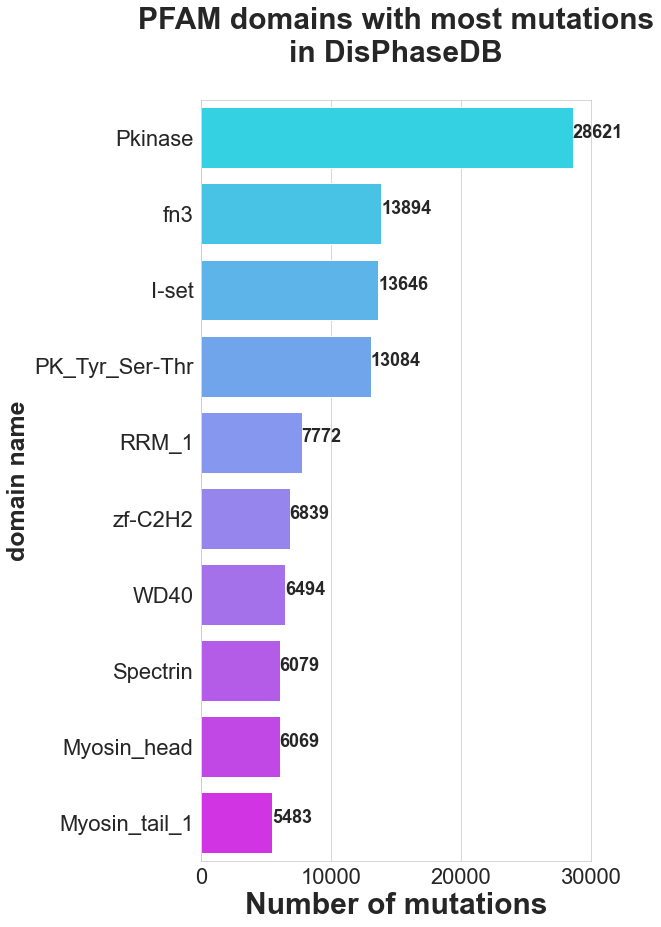

In [92]:
mutation_has_pfam_domain = pd.read_csv('../db_tables/mutation_has_pfam_domain.tsv', sep='\t')
len(mutation_has_pfam_domain.id_mutation.unique()) # 80837 mutaciones en PFAM domains
len(mutation_has_pfam_domain.id_pfam.unique()) # 1639 PFAM domains con mutaciones

# %% Mutaciones en DOMINIOS PFAM
mutation_pfam = pd.read_csv('../db_tables/mutation_has_pfam_domain.tsv', sep='\t')

# Verificar si estan las mutaciones que se eliminaron
# Este es un subset son las que ya no van (en este caso 9)
#eliminar = mutation_pfam[~mutation_pfam.id_mutation.isin(mutations.id_mutation)]
# Con esto las elimino:
#mutation_pfam = mutation_pfam[~mutation_pfam.id_mutation.isin(eliminar.id_mutation)]

# %% Traer el nombre de los PFAM acc
pfam_domain = pd.read_csv('../db_tables/pfam_domain.tsv', sep='\t')
mutation_pfam = mutation_pfam.merge(pfam_domain)
# %% Tengo que agrupar 
# groupby the column to group on "name". Then, ["id_mutation"] to specify the col to perform the actual aggregation.
pfam = mutation_pfam.groupby('pfam_domain')['id_mutation'].count().sort_values(ascending= False)
# %%
pfam_others = pd.Series({'others': pfam[10:].sum()})
pfam_topten = pfam[:10]
pfam_topten_others= pd.concat([pfam_others, pfam_topten])
# %% PLOT Top Ten mutations in PFAM domains
# Horizontal barplot
sns.set_style("whitegrid")
sns.set_palette("cool", 10)

bar,ax = plt.subplots(figsize=(7,14))
ax = sns.barplot(x= pfam_topten, y= pfam_topten.index, orient='h')
ax.set_title("PFAM domains with most mutations\nin DisPhaseDB\n", fontsize=30, weight='bold')
ax.set_xlabel ("Number of mutations", fontsize=30, weight='bold')
ax.set_ylabel ("domain name", fontsize=25, weight='bold')
ax.tick_params(labelsize=22)
for i, v in enumerate(pfam_topten):
    ax.text(v, i, str(v), weight='bold', fontsize=18)

plt.savefig("pfam_mutations.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# QR code for DisPhaseDB web

In [196]:
import qrcode
qr = qrcode.QRCode(
    version= 1,
    error_correction = qrcode.constants.ERROR_CORRECT_H,
    box_size= 15,
    border= 2
)
qr.add_data("http://disphasedb.leloir.org.ar/")
qr.make(fit= True)

img = qr.make_image(fill_color= 'black', back_color= 'white')
img.save("qr-disphase.png")

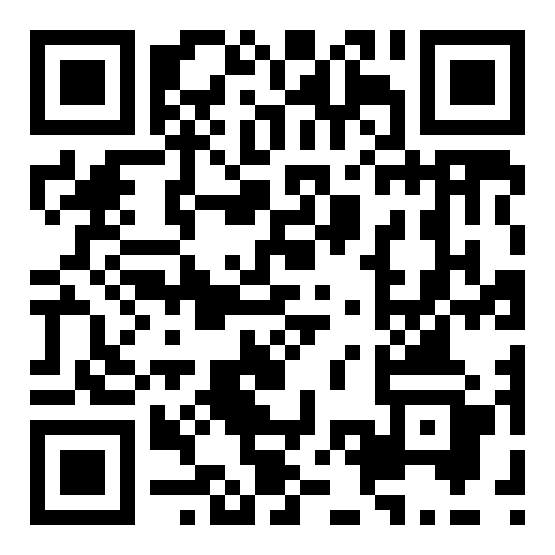

In [195]:
img